Importing modules

In [220]:
reset -fs

In [221]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report 

Loading the data

In [222]:
df = pd.read_excel('Drug_Risk.xls')
df.columns = [c.lower() for c in df.columns]

Dropping rows where people said they used Semer, since it is a fictional drug. Dropping the column ID

In [223]:
df = df.drop(df[df.semer !='CL0'].index)
df.pop('id')
df.pop('semer')
df.ss.head()

0   -1.18084
1   -0.21575
2    0.40148
3   -1.18084
4   -0.21575
Name: ss, dtype: float64

In [224]:
dict_age = {'-0.95197': '18-24','-0.07854': '25-34', '0.49788': '35-44','1.09449': '45-54','1.82213': '55-64',
            '2.59171': '65+'}

In [225]:
dict_sex = {'0.48246':'Female','-0.48246': 'Male'}

In [226]:
dict_edu = {'-2.43591': 'Left school','-1.73790': 'Left school','-1.43719': 'Left school at 17 years',
           '-1.22751': 'Left school at 18 years','-0.61113': 'Some college or university, no certificate or degree',
           '-0.05921': 'Professional certificate/ diploma', '0.45468': 'University degree',
           '1.16365': 'Masters degree', '1.98437': 'Doctorate degree'}

In [227]:
dict_cou = {'-0.09765': 'Australia', '0.24923': 'Canada', '-0.46841': 'New Zealand', '-0.28519': 'Other',
            '0.21128': 'Republic of Ireland','0.96082': 'UK','-0.57009': 'USA'}

In [228]:
dict_eth = {'-0.50212':'Asian','-1.10702': 'Black','1.90725': 'Mixed-Black/Asian',
            '0.12600': 'Mixed-White/Asian','-0.22166' :'Mixed-White/Black','0.11440': 'Other'
            ,'-0.31685': 'White'}

In [229]:
drugs= ['alcohol', 'amphet', 'amyl', 'benzos','caff','cannabis', 'choc', 'coke', 'crack', 'ecstasy',
        'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'shrooms','nicotine','vsa']

In [230]:
for i in range(len(drugs)):
    df[drugs[i]] = df[drugs[i]].replace('CL0',0).replace('CL1',0).replace('CL2',0).replace('CL3',1).replace('CL4',1).replace('CL5',1).replace('CL6',1)
    

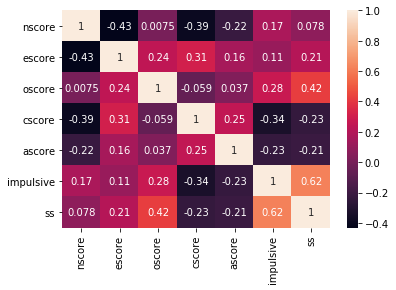

In [231]:
df_corr = pd.DataFrame(df,columns=['nscore','escore','oscore','cscore','ascore','impulsive','ss'])

corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [232]:
soft_drugs = [ 'alcohol','caff','choc', 'nicotine']
middle_drugs = [ 'amyl','cannabis', 'ecstasy', 'ketamine', 'lsd','legalh','shrooms','vsa']
hard_drugs =  ['amphet','benzos', 'coke', 'crack', 'heroin', 'meth']

In [233]:
cat_features = ['age','gender','education','country','ethnicity','alcohol','amphet', 'amyl', 'benzos', 'caff',
                'cannabis','choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
                'shrooms', 'nicotine', 'vsa']

In [234]:
df[cat_features]= df[cat_features].astype('category')

In [235]:
num_features = list(df.columns[df.dtypes==float])

In [236]:
df.columns

Index(['age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss', 'alcohol',
       'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'shrooms',
       'nicotine', 'vsa'],
      dtype='object')

In [237]:
for d in df.columns:
    X = df.drop(d,axis=1)
    y = df[d]
    globals()["X_train_" + str(d)], globals()["X_test_" + str(d)], globals()["y_train_" + str(d)], globals()["y_test_" + str(d)] = train_test_split(X, y, test_size=0.25, random_state=5)

In [238]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('1hot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', num_pipeline, num_features),('cat', cat_pipeline, cat_features)])


In [239]:
pipe_randfor = Pipeline([('preprocessor', preprocessor),('randfor', GradientBoostingClassifier(max_features=1))])

In [240]:
y_train_predicted = cross_val_predict(pipe_randfor, X_train_meth, y_train_meth, cv=5)


In [241]:
model = GradientBoostingClassifier()
model.fit(X_train_meth,y_train_meth)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [242]:
y_test_predicted = model.predict(X_test_meth)

In [246]:
confusion_matrix(y_test_meth, y_test_predicted)

array([[369,  22],
       [ 36,  43]])

In [247]:
print(classification_report(y_test_meth, y_test_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       391
           1       0.66      0.54      0.60        79

    accuracy                           0.88       470
   macro avg       0.79      0.74      0.76       470
weighted avg       0.87      0.88      0.87       470



In [248]:
print(classification_report(y_test_meth, y_test_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       391
           1       0.66      0.54      0.60        79

    accuracy                           0.88       470
   macro avg       0.79      0.74      0.76       470
weighted avg       0.87      0.88      0.87       470



In [249]:
pipe_gradbo = Pipeline([('gradbo', GradientBoostingClassifier())])

In [250]:
param_gradbo = {'gradbo__max_depth':[2,3,4,6],
                'gradbo__learning_rate': [0.01, 0.1, 1],
                'gradbo__n_estimators':[50,100,200]
               }

grid_gradbo = GridSearchCV(pipe_gradbo, param_grid=param_gradbo, cv=3, scoring='accuracy', 
                           verbose=5, n_jobs=-1)

In [251]:
grid_gradbo.fit(X_train_meth, y_train_meth)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gradbo',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
      

In [252]:
best_model = grid_gradbo.best_estimator_['gradbo']

In [253]:
print('Best score:\n{:.2f}'.format(grid_gradbo.best_score_))
print("Best parameters:\n{}".format(grid_gradbo.best_params_))

Best score:
0.87
Best parameters:
{'gradbo__learning_rate': 0.1, 'gradbo__max_depth': 2, 'gradbo__n_estimators': 50}


In [256]:
y_test_predicted = best_model.predict(X_test_meth)

In [257]:
print(classification_report(y_test_meth, y_test_predicted))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       391
           1       0.69      0.43      0.53        79

    accuracy                           0.87       470
   macro avg       0.79      0.70      0.73       470
weighted avg       0.86      0.87      0.86       470



In [178]:
model2= GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100)

In [179]:
model2.fit(X_train_nicotine,y_train_nicotine)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [180]:
y_test_predicted = model2.predict(X_test_nicotine)

In [181]:
print(classification_report(y_test_nicotine, y_test_predicted))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       205
           1       0.76      0.75      0.76       265

    accuracy                           0.73       470
   macro avg       0.73      0.73      0.73       470
weighted avg       0.73      0.73      0.73       470

